In [ ]:
pip install PyTDC
pip install umap-learn


In [1]:
import seaborn as sns
from tdc.multi_pred import DTI
import pandas as pd

# Drug-Target Interaction Prediction

Determining how well a small-molecule drug binds to a new target protein typically involves screening various compounds to gauge their effectiveness. Traditional methods for this rely on costly and time-consuming high-throughput wet-lab experiments. Unfortunately, these methods struggle when handling a large number of candidate compounds due to their resource-intensive nature. To tackle this challenge, drug-target interaction (DTI) prediction tasks employ computational methods that work virtually, using available structural data of compounds and protein amino acid sequences. By doing so, these computational models aim to predict how well a drug interacts with a target protein without the need for expensive lab experiments. Using techniques like machine learning and molecular modeling, these models offer a cost-effective and efficient means to forecast potential drug-target interactions. This advancement in predictive modeling holds great potential for accelerating drug discovery by quickly identifying promising compounds for further experimental exploration, potentially saving time and resources in the early stages of drug development.

# Dataset : KIBA

The chosen dataset is KIBA, which fulfills the requirements of the task as it involves supervised machine learning in a regression model. It contains at least two types of input variables: protein sequences and chemical compounds (drugs).

KIBA provides information on the binding of kinase inhibitors to target proteins, used for predicting Compound-Protein Interactions. The KIBA (Kinase Inhibitor Bioactivity) dataset is a specialized dataset curated specifically for studying the interactions between kinase inhibitors and their target kinases. Kinases are a class of enzymes involved in cellular signaling pathways and are significant targets in drug discovery, particularly in cancer treatment and other diseases related to aberrant signaling pathways.Kinases are a class of enzymes involved in cellular signaling pathways and are significant targets in drug discovery, particularly in cancer treatment and other diseases related to aberrant signaling pathway.

References:

- Tang J, Szwajda A, Shakyawar S, et al. Making sense of large-scale kinase inhibitor bioactivity data sets: a comparative and integrative analysis. J Chem Inf Model. 2014;54(3):735-743.

- Huang, Kexin, et al. “DeepPurpose: a Deep Learning Library for Drug-Target Interaction Prediction” Bioinformatics.

In [2]:
data_K = DTI(name = 'KIBA')

Found local copy...
Loading...
Done!


## Preprocessing

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

In [3]:
data = data_K.get_data()

In [4]:
data_K.print_stats()
print()
print("Binding affinity mean:", data_K.y.mean())

--- Dataset Statistics ---
2068 unique drugs.
229 unique targets.
117657 drug-target pairs.
--------------------------



Binding affinity mean: 11.720685064256795


### Distribution of binding affinity values

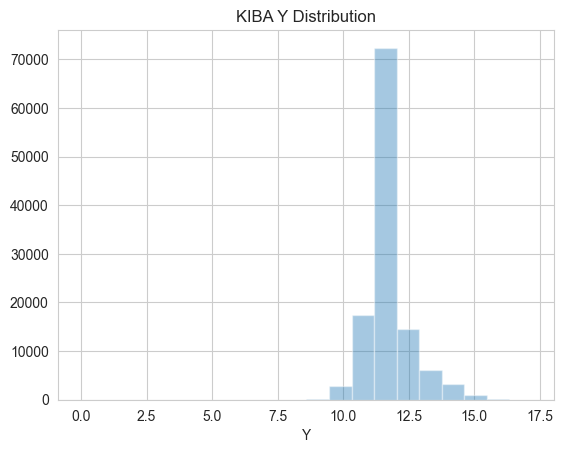

In [5]:
sns.set_style("whitegrid")
Y_plot = sns.distplot(data.Y, kde=False, bins=20).set_title('KIBA Y Distribution')

In [6]:
data.Y.value_counts()

Y
11.200000    15036
11.100000    11881
11.900001     9945
11.300000     8344
11.500000     7573
             ...  
10.837549        1
11.331362        1
12.135269        1
12.441035        1
10.302732        1
Name: count, Length: 2865, dtype: int64

Drugs smiles lenght distribution

Text(0.5, 1.0, 'KIBA Drug Length Distribution')

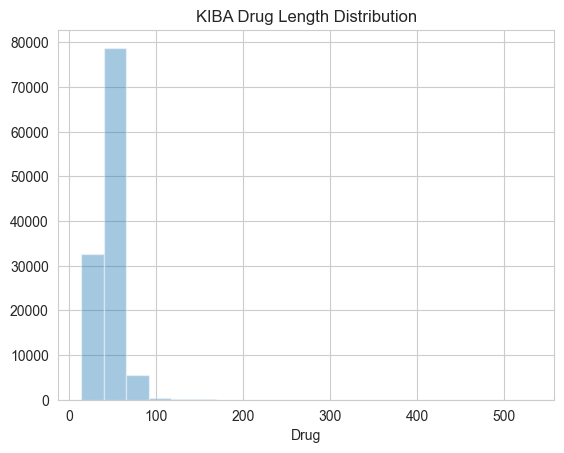

In [7]:
sns.distplot(data.Drug.str.len(), kde=False, bins=20).set_title('KIBA Drug Length Distribution')

Protein aa lengths distribution

Text(0.5, 1.0, 'KIBA Target Length Distribution')

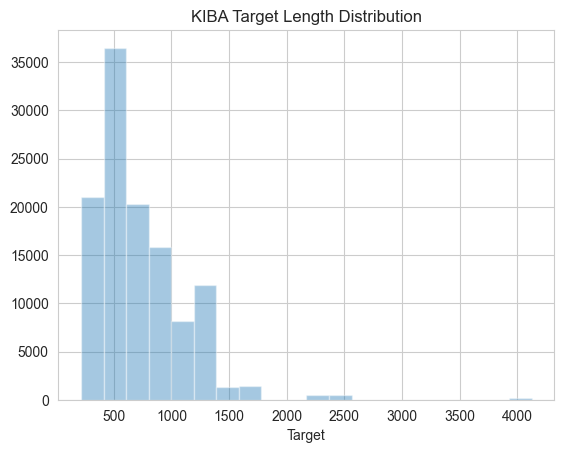

In [8]:
sns.distplot(data.Target.str.len(), kde=False, bins=20).set_title('KIBA Target Length Distribution')

## Data binarization
 We binarize the y variable (binding affinity) by applying as a treshold the value of 12.1, which, according to literature represents the minimum value where the kinases seem to have some effect on the activity of enzymes. With this, values below the treshold will be represented as "0" and values above the treshold will be represented as "1".

- Hakime Öztürk, Arzucan Özgür, Elif Ozkirimli, DeepDTA: deep drug–target binding affinity prediction, Bioinformatics, Volume 34, Issue 17, September 2018, Pages i821–i829, https://doi.org/10.1093/bioinformatics/bty593

In [9]:
data_binarized = data_K.binarize(threshold = 12.1, order ='ascending') 

Binariztion using threshold 12.1, default, we assume the smaller values are 1 and larger ones is 0, you can change the order by 'binarize(order = 'ascending')'


In [10]:
data_binarized.get_data()

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


In [11]:
data_binarized.get_data().Y.value_counts()

Y
0    95091
1    22566
Name: count, dtype: int64

#### Conclusion: The obtained binarized dataset has 95091 DTI with seemingly no inhibition and 22566 with some degree of activity inhibition

In [12]:
df_binarized = data_binarized.get_data(format = 'df')
df_binarized.to_csv('KIBA_binarized.csv', index = False)
df_binarized

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


## Drugs descriptors  

The drug descriptors used in the KIBA dataset typically include a wide range of molecular properties or features that describe the chemical structure of the compounds. These descriptors serve as the input variables for machine learning models aiming to predict interactions between compounds and target proteins. The drug descriptors used are:

- **2D Descriptors:**

- **Morgan Fingerprints:**


In [ ]:
descriptors_smiles = pd.read_csv("https://raw.githubusercontent.com/BrunoAGSa/SIB_Work/main/drugs_descriptors_smiles.csv?token=GHSAT0AAAAAACHXL6AA3SV3C2EY6LAQKJQWZM2D5GA")

In [13]:
descriptors_smiles

In [14]:
morgan_fingerprints = pd.read_csv('https://raw.githubusercontent.com/BrunoAGSa/SIB_Work/main/drugs_morgan_fingerprints.csv?token=GHSAT0AAAAAACHXL6ABI7A775L22MAZG7BUZM2D56Q')

Remove rows with all NaN values from two sets of descriptors ('descriptors_smiles' and 'morgan_fingerprints') and synchronizes corresponding target variables to ensure alignment, resulting in cleaned dataframes and target variables with matching shapes.

In [15]:
# Shape of the dataframes
print(descriptors_smiles.shape, morgan_fingerprints.shape)

# Descriptors smiles

descriptors_smiles = descriptors_smiles.dropna(how='all')

y_descriptors_smiles = df_binarized['Y'].copy()[descriptors_smiles.index]

# Morgan fingerprints

morgan_fingerprints = morgan_fingerprints.dropna(how='all')

y_morgan = df_binarized['Y'].copy()[morgan_fingerprints.index]

descriptors_smiles.shape, y_descriptors_smiles.shape, morgan_fingerprints.shape, y_morgan.shape

(2068, 209) (2068, 1025)


((2068, 209), (2068,), (2068, 1025), (2068,))

In [16]:
# Checking if any of the descriptors have columns with nan values
descriptors_smiles.isna().any().sum(), morgan_fingerprints.isna().any().sum()

(0, 0)

# Protein Descriptors

In [17]:
protein_descriptors = pd.read_csv('https://raw.githubusercontent.com/BrunoAGSa/SIB_Work/main/protein_descriptors.csv?token=GHSAT0AAAAAACHXL6AALGTLDQ2HD3YN3GSSZM2D6NQ')
protein_descriptors = protein_descriptors.iloc[:, :1000]  # tirar esta linha qnd tivermos os descriptores das proteinas direitos
protein_descriptors = protein_descriptors.drop(columns=['Target'])


HTTPError: HTTP Error 404: Not Found

# Drug Encondings

In [ ]:
# drug_encoding = pd.read_csv('drug_encoding.csv')

# Protein Encodings

In [ ]:
# protein_encoding = pd.read_csv('protein_encoding.csv')

Join the drug descriptors and morgan fingerprints


In [ ]:
descriptors_smiles.shape, morgan_fingerprints.shape

In [ ]:
# join the drug descriptors and morgan fingerprints by Drug_ID and not duplicate Drug column

# descriptors_drugs = descriptors_smiles.merge(morgan_fingerprints, on='Drug_ID', how='left')
# descriptors_drugs = descriptors_drugs.drop(columns='Drug_y')
# descriptors_drugs = descriptors_drugs.rename(columns={'Drug_x': 'Drug'})
descriptors_drugs= descriptors_smiles
descriptors_drugs

Split Dataset

In [ ]:
df_binarized_before = df_binarized.copy()
df_binarized_before = df_binarized_before.drop(columns=['Drug', 'Target'])
df_binarized_before

In [ ]:
from sklearn.model_selection import train_test_split

df_binarized_X_train, df_binarized_X_test, df_binarized_y_train, df_binarized_y_test = train_test_split(df_binarized_before.iloc[:, :2], df_binarized_before.iloc[:, -1], test_size=0.2, random_state=42)


In [ ]:
df_binarized_X_train

In [ ]:
df_binarized_y_train

In [ ]:
df_binarized_X_test

# Join all features

In [ ]:
# join the descriptors_drugs to the data_binarized by Drug_ID

descriptors_all_train = df_binarized_X_train.merge(descriptors_drugs, on='Drug_ID', how='left')
descriptors_all_train = descriptors_all_train.merge(protein_descriptors, on='Target_ID', how='left')

descriptors_all_train

In [ ]:
descriptors_all_test = df_binarized_X_test.merge(descriptors_drugs, on='Drug_ID', how='left')
descriptors_all_test = descriptors_all_test.merge(protein_descriptors, on='Target_ID', how='left')

descriptors_all_test

## Standardization

Standardization of these descriptors is fundamental in machine learning workflows as it ensures that the numerical features are on a similar scale, preventing certain features from disproportionately influencing model training due to differences in their original measurement units or scales.

Standardizing descriptors Drugs

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_descriptors_train = scaler.fit_transform(descriptors_all_train.iloc[:, 3:])
scaled_descriptors_train

In [ ]:
scaler = StandardScaler()
scaled_descriptors_test = scaler.fit_transform(descriptors_all_test.iloc[:, 3:])
scaled_descriptors_test

## Feature Selection

By setting a variance threshold of 0.01, the code identifies and retains only those drug descriptors exhibiting sufficient variance, discarding features with low variance that might carry less predictive power. This process of feature selection based on variance helps in dimensionality reduction, optimizing computational efficiency, and streamlining subsequent machine learning tasks. By focusing on descriptors with higher variance, the code ensures that the resulting dataset contains the most informative features, enhancing the quality of drug descriptor data for predictive modeling.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# select features with variance > 0.01
selector = VarianceThreshold(threshold=0.01)
selected_descriptors = selector.fit_transform(scaled_descriptors_train)
selected_columns = descriptors_all_train.iloc[:, 3:].columns[selector.get_support()]
selected_descriptors.shape, selected_columns

In [ ]:
selected_descriptors_train = pd.DataFrame(selected_descriptors, columns=selected_columns)
selected_descriptors_train

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# select features with variance > 0.01
selector = VarianceThreshold(threshold=0.01)
selected_descriptors = selector.fit_transform(scaled_descriptors_test)
selected_columns = descriptors_all_test.iloc[:, 3:].columns[selector.get_support()]
selected_descriptors.shape, selected_columns

In [ ]:
selected_descriptors_test = pd.DataFrame(selected_descriptors, columns=selected_columns)
selected_descriptors_test

## UMAP (Dimensionality reduction)

UMAP is an effective dimensionality reduction technique for visualizing complex data in lower-dimensional spaces. Used in the context of biological data analysis, UMAP enables the representation of drug descriptors in a two-dimensional space while preserving the proximity relationships between the original drugs. 

In [ ]:
# UMAP
import umap.umap_ as umap

# create UMAP object
umap_obj = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation', random_state=42)
# fit UMAP
umap_obj.fit(selected_descriptors_train)

In [ ]:
# plot UMAP
import seaborn as sns

sns.scatterplot(x=umap_obj.embedding_[:, 0], y=umap_obj.embedding_[:, 1], hue = df_binarized_y_train, palette='Spectral')

## KMeans clustering

KMeans clustering is employed on drug descriptors as a method for grouping similar compounds based on their molecular features. This unsupervised learning technique divides the drug dataset into distinct clusters, where compounds within the same cluster share common characteristics. By identifying these clusters, KMeans clustering aids in recognizing patterns and relationships among drugs, 

In [ ]:
#performing KMeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42).fit(df_binarized_y_train.iloc[:, :-1])
kmeans.labels_

#plotting KMeans
sns.scatterplot(x=umap_obj.embedding_[:, 0], y=umap_obj.embedding_[:, 1],hue=kmeans.labels_, palette='Spectral')

## PCA

Principal Component Analysis (PCA) is a technique applied to drug descriptors in the context of dimensionality reduction. In this process, the original drug descriptors are transformed into new sets, known as "principal components." These components capture the fundamental relationships between different descriptors, enabling a more efficient and simplified representation.

In [ ]:
#performing PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca.fit(df_binarized_y_train.iloc[:, :-1])
pca_df = pca.transform(df_binarized_y_train.iloc[:, :-1])
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
pca_df.insert(2, 'Y', coluna)
pca_df

#plotting PCA
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"],hue=pca_df["Y"], palette='Spectral')

In [ ]:
selected_descriptors_train

In [ ]:
selected_descriptors_test

In [ ]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

# Choose a machine learning model (Random Forest as an example)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(selected_descriptors_train, df_binarized_y_train)

# Make predictions on the test set
predictions = model_rf.predict(selected_descriptors_test)

# Evaluate the model
accuracy = accuracy_score(df_binarized_y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report for more detailed evaluation
print("Classification Report:\n", classification_report(df_binarized_y_test, predictions))

# calculate the AUROC
predictions = model_rf.predict_proba(selected_descriptors_test)
predictions = predictions[:, 1]
print("AUROC for Random Forest:", roc_auc_score(df_binarized_y_test, predictions))

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(selected_descriptors_train, df_binarized_y_train)

predictions = model_lr.predict(selected_descriptors_test)

accuracy = accuracy_score(df_binarized_y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(df_binarized_y_test, predictions))

# calculate the AUROC
predictions = model_lr.predict_proba(selected_descriptors_test)
predictions = predictions[:, 1]
print("AUROC for LogisticRegression:", roc_auc_score(df_binarized_y_test, predictions))

In [ ]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(selected_descriptors_train, df_binarized_y_train)

predictions = model_knn.predict(selected_descriptors_test)

accuracy = accuracy_score(df_binarized_y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(df_binarized_y_test, predictions))

# calculate the AUROC
predictions = model_knn.predict_proba(selected_descriptors_test)
predictions = predictions[:, 1]
print("AUROC for Kneighbors:", roc_auc_score(df_binarized_y_test, predictions))

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(selected_descriptors_train, df_binarized_y_train)

predictions = model_dt.predict(selected_descriptors_test)

accuracy = accuracy_score(df_binarized_y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(df_binarized_y_test, predictions))

# calculate the AUROC
predictions = model_dt.predict_proba(selected_descriptors_test)
predictions = predictions[:, 1]
print("AUROC for DecisionTreeClassifier:", roc_auc_score(df_binarized_y_test, predictions))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have predictions for each model
predictions_rf = model_rf.predict_proba(selected_descriptors_test)[:, 1]
predictions_lr = model_lr.predict_proba(selected_descriptors_test)[:, 1]
predictions_knn = model_knn.predict_proba(selected_descriptors_test)[:, 1]
predictions_dt = model_dt.predict_proba(selected_descriptors_test)[:, 1]

# Calculate ROC curves and AUROC scores
fpr_rf, tpr_rf, _ = roc_curve(df_binarized_y_test, predictions_rf)
fpr_lr, tpr_lr, _ = roc_curve(df_binarized_y_test, predictions_lr)
fpr_knn, tpr_knn, _ = roc_curve(df_binarized_y_test, predictions_knn)
fpr_dt, tpr_dt, _ = roc_curve(df_binarized_y_test, predictions_dt)

auroc_rf = auc(fpr_rf, tpr_rf)
auroc_lr = auc(fpr_lr, tpr_lr)
auroc_knn = auc(fpr_knn, tpr_knn)
auroc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUROC = {auroc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUROC = {auroc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUROC = {auroc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUROC = {auroc_dt:.2f})')

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()